# TEST claro_class.py

In [1]:
from claro_class import *

## Testing complete routine in Claro class

In [2]:
# Define parameters to build Claro object
TDIR = 'C:\\Users\\MARTINA\\Desktop\\secondolotto_1\\'
PARAMS = {
    "DIRPATH"  : "*Station_1__*\Station_1__??_Summary\Chip_???\S_curve",
    "FILEPATH" : "Ch_*_offset_*_Chip_*.txt",
    "OUTFILE"  : "claro_files.txt",
    "OUTBAD"   : "bad_files.txt",
    "UNFIT"    : "unfit_files.txt",
}

In [3]:
new = Claro(TDIR=TDIR, params=PARAMS, custom_n_files='all', log=True)

In [4]:
new.tdir # @property method, tdir is ._tdir

'C:\\Users\\MARTINA\\Desktop\\secondolotto_1\\'

In [5]:
# Method to produce dict with info about files with given PARAMS and TDIR
new.get_fileinfos()

Processing file n. 41461...n: C:\Users\MARTINA\Desktop\secondolotto_1\Station_1__36\Station_1__36_Summary\Chip_180\S_curve\Ch_0_offset_0_Chip_180.txt. First word: error. Going on....

Process completed in 53.17 s.

Total number of files found: 41461.
Total number of good files: 40911. Output paths to good files are stored in self.claro_files. Print it with print_log().
Total number of bad files: 550 (1.3%) out of total). Output paths to bad files are stored in self.bad_files. Print it with print_log().


In [6]:
# Method to find dict of a single amplifier...
file1_11_001_7 = Claro.find_fileinfos(new.fileinfos, station="1", sub="11", chip="001", ch="7")
file1_11_001_7

{'path': 'C:\\Users\\MARTINA\\Desktop\\secondolotto_1\\Station_1__11\\Station_1__11_Summary\\Chip_001\\S_curve\\Ch_7_offset_0_Chip_001.txt',
 'station': '1',
 'sub': '11',
 'chip': '001',
 'ch': '7',
 'offset': '0',
 'amplitude': 1001.014499,
 'transition': 186.527393,
 'width': -2.256561}

In [7]:
# ...that works with a path as well
Claro.find_fileinfos(new.fileinfos, path=file1_11_001_7['path'])

{'path': 'C:\\Users\\MARTINA\\Desktop\\secondolotto_1\\Station_1__11\\Station_1__11_Summary\\Chip_001\\S_curve\\Ch_7_offset_0_Chip_001.txt',
 'station': '1',
 'sub': '11',
 'chip': '001',
 'ch': '7',
 'offset': '0',
 'amplitude': 1001.014499,
 'transition': 186.527393,
 'width': -2.256561}

In [8]:
# We have the list of good files (that are the files in new.fileinfos)...
for n, file in enumerate(new.good_files):
    if n<3: print(file)
print("...")

C:\Users\MARTINA\Desktop\secondolotto_1\Station_1__11\Station_1__11_Summary\Chip_001\S_curve\Ch_0_offset_0_Chip_001.txt
C:\Users\MARTINA\Desktop\secondolotto_1\Station_1__11\Station_1__11_Summary\Chip_001\S_curve\Ch_1_offset_0_Chip_001.txt
C:\Users\MARTINA\Desktop\secondolotto_1\Station_1__11\Station_1__11_Summary\Chip_001\S_curve\Ch_2_offset_0_Chip_001.txt
...


In [9]:
# ... and the list of bad files...
for n, file in enumerate(new.bad_files):
    if n<3: print(file)
print("...")

C:\Users\MARTINA\Desktop\secondolotto_1\Station_1__11\Station_1__11_Summary\Chip_001\S_curve\Ch_8_offset_0_Chip_001.txt
C:\Users\MARTINA\Desktop\secondolotto_1\Station_1__11\Station_1__11_Summary\Chip_012\S_curve\Ch_2_offset_0_Chip_012.txt
C:\Users\MARTINA\Desktop\secondolotto_1\Station_1__11\Station_1__11_Summary\Chip_018\S_curve\Ch_1_offset_0_Chip_018.txt
...


In [10]:
# Custom-made representation of Claro object
print(new)

top dir:   C:\Users\MARTINA\Desktop\secondolotto_1\
params:    {'DIRPATH': '*Station_1__*\\Station_1__??_Summary\\Chip_???\\S_curve', 'FILEPATH': 'Ch_*_offset_*_Chip_*.txt', 'OUTFILE': 'claro_files.txt', 'OUTBAD': 'bad_files.txt', 'UNFIT': 'unfit_files.txt'}
meta:      {'nfiles': 41461, 'ngood': 40911, 'nbad': 550}



In [11]:
# Method to analyze (fit with erf function) all files in fileinfos in a loop
# This method is based on the method to fit one single file defined in class Single, Single.fit_erf()
# self.unfit_files is a list that is automatically produced
fit_dict = {'guesses':'default', # Fits with guesses = [amplitude, transition, width]
            'interactive' : False, # If True prints "Fit ok!" or prints errors and warnings
           }
newdict = new.analysis_loop(fit_dict)

In [12]:
# ... and the list of unfitted files, that can be printed on file via .print_log()
for n, file in enumerate(new.unfit_files):
    if n<3: print(file)
print("...")

C:\Users\MARTINA\Desktop\secondolotto_1\Station_1__11\Station_1__11_Summary\Chip_204\S_curve\Ch_4_offset_0_Chip_204.txt
C:\Users\MARTINA\Desktop\secondolotto_1\Station_1__11\Station_1__11_Summary\Chip_205\S_curve\Ch_2_offset_0_Chip_205.txt
C:\Users\MARTINA\Desktop\secondolotto_1\Station_1__11\Station_1__11_Summary\Chip_207\S_curve\Ch_5_offset_0_Chip_207.txt
...


In [13]:
# Method to print files with lists of good, bad, unfit files
# The previously produced files are overwritten at every run
new.print_log(good_files=True, bad_files=True, unfit_files=True)

In [ ]:
# Method to plot scatterplot and fit of files in a loop
# This method is based on the method to plot one single file defined in class Single, Single.plot()  
plot_dict = {'npoints':1000,
             'interactive':False, # If True prints eventual errors due to the fit parameters
             'show_scatter':True,
             'show_fit':True,
             'show_transition':True,
             'save' : False,
             'save_dir':'.\Plot_loop\\',
             'save_format':'pdf',
            }
new.plot_loop(fit_dict, plot_dict, show=False)

In [ ]:
# Method to plot scatterplot and fit of the data on a multi-page pdf, with user-defined number of plots per page
# This method is based on Single.fit_erf and Single.plot and accepts dicts with parameters to pass to those functions
new.plot_MultiPage(fit_dict, plot_dict, save=False, save_path='aHundredPlots.pdf')

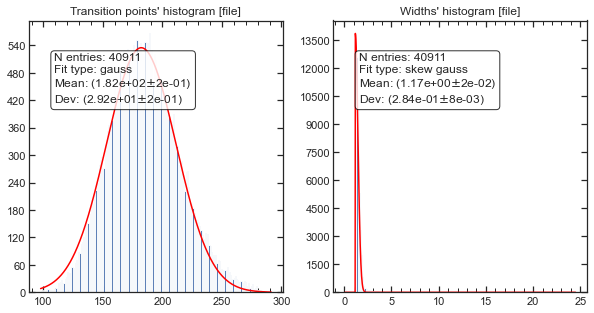

In [16]:
# Method to plot histograms of transition points (x values) and widths
# You can plot values from datafile or from fit or the difference between the two
# This method requires external figure and saving options
fig, ax = plt.subplots(1,2, figsize=(10,5))
new.hist_tw(ax=ax, source='file')
plt.savefig("hist_tw-fromFile.pdf")

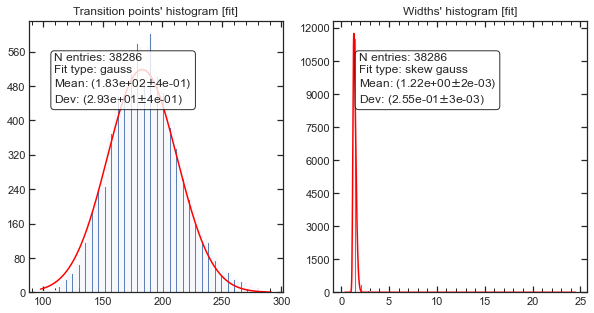

In [17]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
new.hist_tw(ax=ax, source='fit')
plt.savefig("hist_tw-fromFit.pdf")

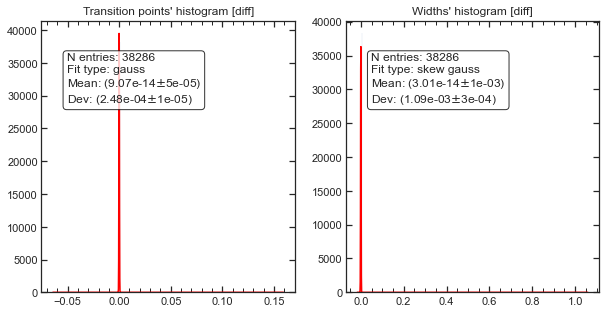

In [18]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
new.hist_tw(ax=ax, source='diff')
plt.savefig("hist_tw-Diffs.pdf")

## Testing sub-routine for Single class